<a href="https://colab.research.google.com/github/kimdahyeon977/kimdahyeon/blob/master/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME ='computer vision'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/computer vision


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(858, 2)
(215, 1)


Data Visualization and Preprocessing

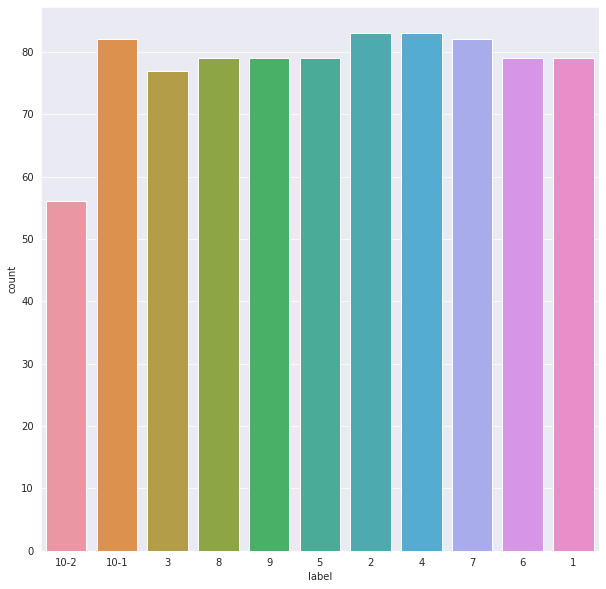

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(train['label'])
#충분히 balance해보임

In [ ]:
train.isna().sum()

file_name    0
label        0
dtype: int64

이미지 불러오기

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#오피스아워

In [ ]:
import cv2
from tqdm import tqdm
img_arrays=[]
for file in tqdm(train['file_name']):
    img=cv2.imread('train/'+file)
    #img = cv2.resize(img, (64, 64))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays.append(np.array(img))
train_img=np.array(img_arrays)

100%|██████████| 858/858 [03:47<00:00,  3.77it/s]


In [ ]:
img_arrays2=[]
for file in tqdm(test['file_name']):
    img=cv2.imread('test/'+file)
    img = cv2.resize(img, (64, 64))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays2.append(np.array(img))
test_img=np.array(img_arrays2)

100%|██████████| 215/215 [00:59<00:00,  3.59it/s]


In [ ]:
train_img.shape

(858, 224, 224, 3)

In [ ]:
def convert_obj2int(obj):
  if obj=='10-1':
      obj='10'
  elif obj=='10-2':
      obj='0'
  else:
      obj
  return int(obj)
#모델링을 하기 위해 label을 정수형으로 수정해 주겠습니다.
#파이토치는 클래스의 인덱스 번호가 0부터 읽어들이기 때문에,
#10-1를 정수 10으로, 10를 정수 0으로 바꿔주고
#label 열의 타입을 int로 수정해 주겠습니다.

In [ ]:
train['label']=train['label'].apply(convert_obj2int)
train.head(3)

,file_name,label
0,001.png,0
1,002.png,10
2,003.png,3


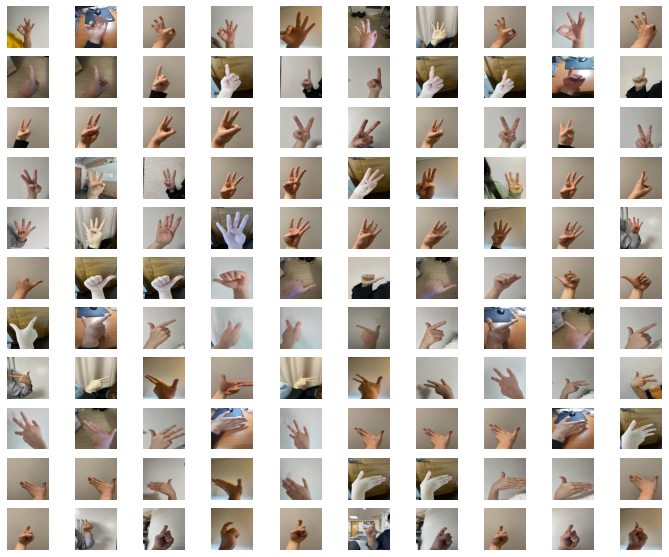

In [ ]:
#잘 불러와졌는지 보자
plt.figure(figsize=(12,10))

for n in range(0,11):  
    train_idx = train[train["label"] == n].tail(10).index
    for i, m in enumerate(train_idx):
        img = train_img[m]
        plt.subplot(11, 10, (n*10)+(i+1))  #행은 class수 열은 시각화할 개수
        plt.imshow(img, cmap=plt.cm.binary)
        plt.axis("off")

In [ ]:
# for n in range(0,11):  
#     train_idx = train[train["label"] == n].index
#     print(f"label : {n}")
#     plt.figure(figsize=(12,30))
    
#     for i, m in enumerate(train_idx):
#         img = train_img[m]
#         plt.subplot(56, 21, (i+1)) 
#         plt.imshow(img)
#         plt.axis("off")
#     plt.show()    

In [ ]:
#train_img=train_img.reshape(-1,train_img.shape[1],train_img.shape[2],1)
train_img=train_img/255

In [ ]:
#test_img=test_img.reshape(-1,test_img.shape[1],test_img.shape[2],1)
test_img=test_img/255

In [ ]:
train_img.shape

(858, 224, 224, 3)

In [ ]:
test_img.shape

(215, 64, 64, 3)

In [ ]:
# fig,axe=plt.subplots(2,2)
# fig.suptitle('Preview of dataset')
# axe[0,0].imshow(test_img[0].reshape(28,28),cmap='gray')
# axe[0,0].set_title('label: 3  letter: C')
# axe[0,1].imshow(test_img[1].reshape(28,28),cmap='gray')
# axe[0,1].set_title('label: 6  letter: F')
# axe[1,0].imshow(test_img[2].reshape(28,28),cmap='gray')
# axe[1,0].set_title('label: 2  letter: B')
# axe[1,1].imshow(test_img[4].reshape(28,28),cmap='gray')
# axe[1,1].set_title('label: 13  letter: M')

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train_img,pd.get_dummies(train['label']),test_size=0.1,random_state=4)

In [ ]:
from keras.utils.np_utils import to_categorical
y=train['label']
y=to_categorical(y)

###성능 개선을 위한 label smoothing

In [ ]:
def smooth_labels(labels, factor=0.1):
	# smooth the labels
	labels *= (1 - factor)
	labels += (factor / labels.shape[1])
	# returned the smoothed labels
	return labels

In [ ]:
smooth_labels(y)

array([[0.9090909 , 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.9090909 ],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091],
       ...,
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.9090909 ],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091]], dtype=float32)

In [ ]:

from sklearn.model_selection import KFold
kf = KFold(5,shuffle=True, random_state=2022)
for train_index, test_index in kf.split(train_img):
    X_train,X_test=train_img[train_index],train_img[test_index]
    y_train,y_test=y[train_index],y[test_index]
X_train.shape

(687, 224, 224, 3)

In [ ]:
#전처리 파이프라인
def pipeline(df1,df2):
  def convert_obj2int(obj):
    if obj=='10-1':
        obj='10'
    elif obj=='10-2':
        obj='0'
    else:
        obj
    return int(obj)
  df1['label']=df1['label'].apply(convert_obj2int)
  img_arrays=[]
  for file in train['file_name']:
    img=Image.open('computer vision/train/'+file)
    img_arrays.append(np.array(img))
  train_img=np.array(img_arrays)
  img_arrays2=[]
  for file in test['file_name']:
    img=Image.open('computer vision/test/'+file)
    img_arrays2.append(np.array(img))
  test_img=np.array(img_arrays)
  X_train=train_img.reshape(-1,train_img.shape[1],train_img.shape[2],3)
  X_train=X_train/255
  y_train=df1['label']
  X_test=test_img.reshape(-1,test_img.shape[1],test_img.shape[2],3)
  X_test=X_test/255
  return X_train,y_train,X_test

##Data augumentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_img)

데이터 확대를 위해 다음을 선택했습니다.

일부 교육 이미지를 10도 랜덤으로 회전합니다. 10도 랜덤으로 확대/축소합니다. 일부 교육 이미지는 너비의 10%만큼 수평으로 임의로 이동합니다. 이미지의 높이를 10%만큼 수직으로 임의로 이동합니다. 분류가 잘못될 수 있으므로 vertical_flip 또는 horizontal_flip을 적용하지 않았습니다.

모델이 준비되면, 우리는 훈련 데이터 세트를 맞춘다.

##Modeling : Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers,Input
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Resizing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score

In [ ]:
from keras.callbacks import ReduceLROnPlateau  #https://deep-deep-deep.tistory.com/56
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience = 2, verbose=2,factor=0.5, min_lr=0.00001) # lr을 계속 절반으로 감소시킬것임

In [ ]:
#model.save('saved_model')

In [ ]:
#model.save('saved_model.h5')

In [ ]:
# loaded_model = tf.keras.models.load_model("saved_model")

# loaded_model.summary()

In [ ]:
model1 = Sequential()

model1.add(layers.Conv2D(32, (3, 3), input_shape = X_train.shape[1:], activation='relu'))
model1.add(layers.MaxPooling2D(pool_size = (2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size = (2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size = (2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Flatten())

model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.Dense(11, activation = 'softmax'))
model1.summary()
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 64)       

In [ ]:

mod_res_1 = model1.fit(X_train,y_train, batch_size = 128, epochs = 50, verbose = 2, validation_data = (X_test, y_test))

Epoch 1/50


In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = mod_res_1.history['accuracy']
train_loss = mod_res_1.history['loss']
val_acc = mod_res_1.history['val_accuracy']
val_loss = mod_res_1.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
print("Accuracy of the model is - " , model1.evaluate(X_train,y_train)[1]*100 , "%")

In [ ]:
# import pickle
# pickle.dump(model1, open('model1.pkl','wb'))

##Add LR Sceduler 

In [ ]:
import math
from keras.callbacks import LearningRateScheduler
initial_learning_rate = 0.00001
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)
# Fit the model to the training data
history_exp_decay = model1.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
)


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/100
9/9 [==============================] - 60s 7s/step - loss: 2.4057 - accuracy: 0.1002 - val_loss: 2.4051 - val_accuracy: 0.0725 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 9.048374180359596e-06.
Epoch 2/100
9/9 [==============================] - 58s 6s/step - loss: 2.3943 - accuracy: 0.0929 - val_loss: 2.3985 - val_accuracy: 0.1014 - lr: 9.0484e-06

Epoch 3: LearningRateScheduler setting learning rate to 8.18730753077982e-06.
Epoch 3/100
9/9 [==============================] - 56s 6s/step - loss: 2.3903 - accuracy: 0.1075 - val_loss: 2.3965 - val_accuracy: 0.1232 - lr: 8.1873e-06

Epoch 4: LearningRateScheduler setting learning rate to 7.408182206817179e-06.
Epoch 4/100
9/9 [==============================] - 57s 6s/step - loss: 2.3873 - accuracy: 0.1202 - val_loss: 2.4029 - val_accuracy: 0.0725 - lr: 7.4082e-06

Epoch 5: LearningRateScheduler setting learning rate to 6.70320046035639

#Train : 97 % / Test : 64.32
-> overfitting....
##Let's fight with overfitting
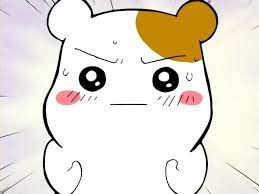

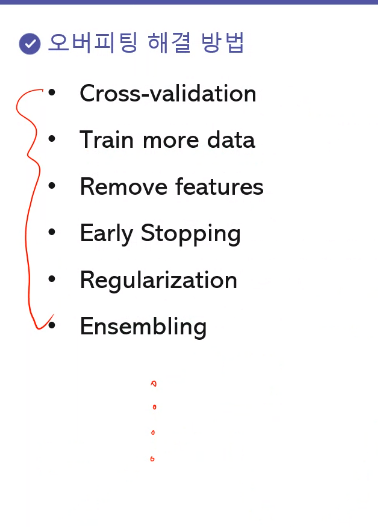

### (1) Regularization 
weight decay(l2 regularization)를 적용해볼것이다.

In [ ]:
model2 = Sequential()

model2.add(layers.Conv2D(32, (3, 3), input_shape = X_train.shape[1:], activation='relu'))
model2.add(layers.MaxPooling2D(pool_size = (2, 2)))
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(pool_size = (2, 2)))
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(pool_size = (2, 2)))
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten())

model2.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.01),activation = 'relu'))
model2.add(layers.Dense(11,kernel_regularizer=regularizers.l2(0.01), activation = 'softmax'))
model2.summary()
model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [ ]:

mod_res_3 = model2.fit(X_train,y_train, batch_size = 128, epochs = 50, verbose = 2, validation_data = (X_test, y_test))

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = mod_res_3.history['accuracy']
train_loss = mod_res_3.history['loss']
val_acc = mod_res_3.history['val_accuracy']
val_loss = mod_res_3.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
print("Accuracy of the model is - " , model2.evaluate(X_test,y_test)[1]*100 , "%")

# Train : 92 , Test : 62.57
epoch 10까진 효과가 있었으나 다시 과적합되는 경향을 보인다! 이럴경우 10에서부터 다시 시작하는 방법을 쓰자. -> 앙상블 기법 도입

### (2) Ensemble
epoch10에서부터 다른 모형을 써서 과적합을 해결해볼것이다.


In [ ]:
loaded_model=tf.keras.models.load_model('en_model')
history2=loaded_model.fit(X_train,y_train, batch_size = 128,  verbose = 2, validation_data = (X_test, y_test),initial_epoch=0,epochs=10)

In [ ]:
# model2.save('en_model')
# loaded_model=tf.keras.models.load_model('en_model')

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape =X_train.shape[1:], activation='relu'))
model3.add(layers.MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(128,kernel_regularizer=regularizers.l2(0.02), activation = 'relu'))
model3.add(Dense(11,kernel_regularizer=regularizers.l2(0.02), activation = 'softmax'))
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model3.summary()

In [ ]:
history2=model3.fit(X_train,y_train, batch_size = 128,  verbose = 2, validation_data = (X_test, y_test),initial_epoch=11,epochs=51,shuffle=True)

#오피스아워

In [ ]:
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = history2.history['acc']
train_loss = history2.history['loss']
val_acc = history2.history['val_acc']
val_loss = history2.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
print("Accuracy of the model is - " , model3.evaluate(X_test,y_test)[1]*100 , "%")

그래프로 보면 과적합이 조금 해결된 것 같아보이지만 epoch 40이후 부터는 여전히 심각한 과적합이다. 

##(2) 변수의 개수 줄이기

CV에서 변수의 개수 줄이기는 이미지 사이즈를 작게 하는 것, 흑백사진으로 바꾸는 것등이다.

In [ ]:
model4 = Sequential()
model4.add(Resizing(28, 28))
model4.add(layers.Conv2D(128, (3, 3), activation='relu' , input_shape = (28,28,3)))
model4.add(layers.MaxPooling2D(pool_size = (2, 2)))
model4.add(layers.Dropout(0.2))

model4.add(layers.Conv2D(200, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D(pool_size = (2, 2)))
model4.add(layers.Dropout(0.2))

model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D(pool_size = (2, 2)))
model4.add(layers.Dropout(0.2))

model4.add(layers.Flatten())

model4.add(layers.Dense(128,activation = 'relu'))
model4.add(layers.Dense(11, activation = 'softmax'))
model4.build(input_shape=(None,28,28,3))
model4.summary()
model4.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [ ]:
#파라미터 수가 24만개로 급격히 축소한 것을 알 수 있다.
history4=model4.fit(X_train,y_train, batch_size = 128,  verbose = 2, validation_data = (X_test, y_test),epochs=90,shuffle=True)

In [ ]:
epochs = [i for i in range(90)]
fig , ax = plt.subplots(1,2)
train_acc = history4.history['accuracy']
train_loss = history4.history['loss']
val_acc = history4.history['val_accuracy']
val_loss = history4.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
print("Accuracy of the model is - " , model4.evaluate(X_test,y_test)[1]*100 , "%")

#Train : 93 / Test : 70

### (3) Train more data : Data augumentation

원래도 적었는데 KFold하니까 더 적어져서 과적합이 일어난다.

보통은 Train에만 augumentation을 하므로 그렇게 하자

하지만 성능은 떨어지므로 eoichs를 80으로 늘렸다.

In [ ]:
mod_res_2 = model1.fit(datagen.flow(X_train,y_train, batch_size = 128), epochs = 80, verbose = 2, validation_data = (X_test, y_test))

In [ ]:
epochs = [i for i in range(80)]
fig , ax = plt.subplots(1,2)
train_acc = mod_res_2.history['accuracy']
train_loss = mod_res_2.history['loss']
val_acc = mod_res_2.history['val_accuracy']
val_loss = mod_res_2.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
print("Accuracy of the model is - " , model1.evaluate(X_test,y_test)[1]*100 , "%")

##train : 97 , test : 70 

조금은 나아졌다. 하지만 여전히 존재하므로 다음 step을 시도하자

## (3) Cross validation 

keras에서는 CV에 대한 라이브러리를 제공하지 않아서 직접 구현해야한다. 나는 cs231n assignment에서 짰던 코드를 가져와서 쓸것이다.

In [ ]:
from keras import models
num_folds = 5

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

X_train_folds = np.array_split(X_train,num_folds) #https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=djyoon1125&logNo=221459987749 #행별로 자른다.즉, 5000/5= 1000묶음 생성
y_train_folds = np.array_split(y_train,num_folds) #행별로 자른다.즉, 5000/5= 1000묶음 생성

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of k that we find : k와 accuracy를 dictionary에 저장하라
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k. #k에 따라서 accuray각각 구하기 -> 반복문 써야겠군!



################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
#cross-validation : https://wooono.tistory.com/105
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
#for문처럼 반복되는 구간에서 객체가 현재 어느 위치에 있는지 알려 주는 인덱스 값이 필요할때 enumerate 함수를 사용하면 매우 유용하다.
#https://www.daleseo.com/python-enumerate/
k_to_accuracies = [] #형변환을 의도적으로 해줌( append함수 쓰기)
val_sum=0
for j in range(num_folds):
        x_train_fold = np.concatenate([x for num,x in enumerate(X_train_folds) if num!=j]) #num <=> j / x = X_train_folds[num]
        y_train_fold = np.concatenate([y for num,y in enumerate(y_train_folds) if num!=j])
        
        model1.fit(datagen.flow(x_train_fold,y_train_fold, batch_size = 128),  validation_data = (X_train_folds[j],y_train_folds[j]),epochs = 80, verbose = 0)
        k_accuracy = model1.evaluate(X_train_folds[j],y_train_folds[j])[1]*100
        k_to_accuracies.append(k_accuracy)
        


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(x_train_fold.shape)
print(y_train_fold.shape)
# Print out the computed accuracies
for accuracy in sorted(k_to_accuracies):
        print('val_acc = %f' % (accuracy))
print(' avg_val_acc = %f' % (np.mean(k_to_accuracies)))

In [ ]:
model1.evaluate(X_test,y_test)[1]*100

##train : 97 , test : 76

조금은 나아졌다. 하지만 여전히 존재하므로 다음 step을 시도하자

##전이학습

###ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, LambdaCallback
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

input = Input(shape=train_img[0].shape)
model = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')

x = model.output
x = Dense(32, name='fully')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x=Dropout(0.5)(x)
x = Dense(11, activation='softmax', name='softmax')(x)
model = Model(model.input, x)
model.summary()

# train_datagen = ImageDataGenerator(rescale=1./255)#rgb값 reduce
# train_generator = train_datagen.flow_from_directory(
#         './train',
#         target_size=(112, 112),
#         batch_size=30,
#         class_mode='categorical')

# val_datagen = ImageDataGenerator(rescale=1./255)
# val_generator = val_datagen.flow_from_directory(
#         './test',
#         target_size=(112, 112),
#         batch_size=30,
#         class_mode='categorical')

model.compile(loss='categorical_crossentropy',
                  #optimizer=optimizers.RMSprop(lr=2e-4),
                  optimizer='adam',
                  metrics=['acc'])

print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.layers[3].get_weights()))
early_stopping = EarlyStopping(patience=3, mode='auto', monitor='val_acc')
history = model.fit(X_train,y_train,
                              epochs=40,
                              
                              validation_data=(X_test, y_test),
                              shuffle=True,
                              verbose=2
                              )


"""
# Store the fully connected layers
fc1 = model.layers[-3]
fc2 = model.layers[-2]
predictions = model.layers[-1]s
# Create the dropout layers
dropout1 = Dropout(0.85)
dropout2 = Dropout(0.85)
# Reconnect the layers
x = dropout1(fc1.output)
x = fc2(x)
x = dropout2(x)
predictors = predictions(x)
# Create a new model
model2 = Model(inputs=model.input, outputs=predictors)
model2.summary()
"""

In [ ]:
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = model1.history['accuracy']
train_loss = model1.history['loss']
val_acc = model1.history['val_accuracy']
val_loss = model1.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
model1.save('saved_model1')

In [ ]:
print("Accuracy of the model is - " , model.evaluate(train_img[800:1200],y[800:1200])[1]*100 , "%")

# 대체로 90%정도의 정확도를 보인다.

###Efficient B0 -> 왜 인지는 모르겠지만 10%이상 맞추지를 못한다.....

In [ ]:
!pip install efficientnet

In [ ]:
import efficientnet.keras as efn
from keras.layers import GlobalAveragePooling2D

In [ ]:
train_img[0].shape

In [ ]:
efnb0 = efn.EfficientNetB0(weights=None, include_top=False, input_shape=train_img[0].shape, classes=11)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

model.summary()

In [ ]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
optimizer = Adam(lr=0.000001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 2, factor= 0.5, min_lr= 1e-6, verbose=1)
#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_history = model.fit(train_img,y, validation_data = (X_test,y_test),verbose = 2, epochs = 30)

##제출하기

In [ ]:
preds=model1.predict(test_img)
result=[]
class_prediction=np.argmax(preds[0])
for i in range(0,len(test_img)):
    result.append(np.argmax(preds[i]))
print(result)

In [ ]:
submission=pd.read_csv('sample_submission.csv')


In [ ]:
submission['label']=result
submission

In [ ]:
submission['label'][submission['label'] == 10] = '10-1' ## label : 10 -> '10-1'
submission['label'][submission['label'] == 0] = '10-2' ## Label : 0 -> '10-2'
submission['label'] = submission['label'].apply(lambda x : str(x))

In [ ]:
print(submission.head())
print(submission.tail())

In [ ]:
submission.to_csv('fin_submit.csv',index=False)